In [218]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid')
custom_palette = ["#014991","#1C669D","#C19991","#FCD9BF","#D1A2CC","#4F69DE"]

In [219]:
#loading dataset
df=pd.read_csv('/content/adult.csv')

In [220]:
#showing top 10 rows
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [221]:
#showing last 10 rows
df.tail(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48832,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
48833,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
48834,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
48835,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
48836,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


From Head & Tail we findout :

1. There is missing values have value "?"
2. All data in native-country column has value "United-States" so may be US is the most country in dataset
3. Each education has its own educational-num


In [222]:
#printing shape of the data
df.shape

(48842, 15)

In [223]:
#information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [224]:
#replace ? with nan
df.replace('?',np.nan,inplace=True)

From informations we find out there is null values in:

1. Column "worlclass"
2. Column "occupation"
3. Column "native-country"


In [225]:
#calculating percenatge of null values
(df.isnull().sum()/df.shape[0])*100

,0
age,0.000000
workclass,5.730724
fnlwgt,0.000000
education,0.000000
educational-num,0.000000
marital-status,0.000000
occupation,5.751198
relationship,0.000000
race,0.000000
gender,0.000000


* workclass and occupation: These columns have similar null value percentages (5.73% and 5.75% respectively), suggesting a potential relationship or common cause for missing data.
* native-country: This column has a lower null value percentage (1.75%).










In [226]:
#description about the numerical data
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [227]:
#description about the categorical data
df.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,46043,48842,48842,46033,48842,48842,48842,47985,48842
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


**Univariate Analysis**

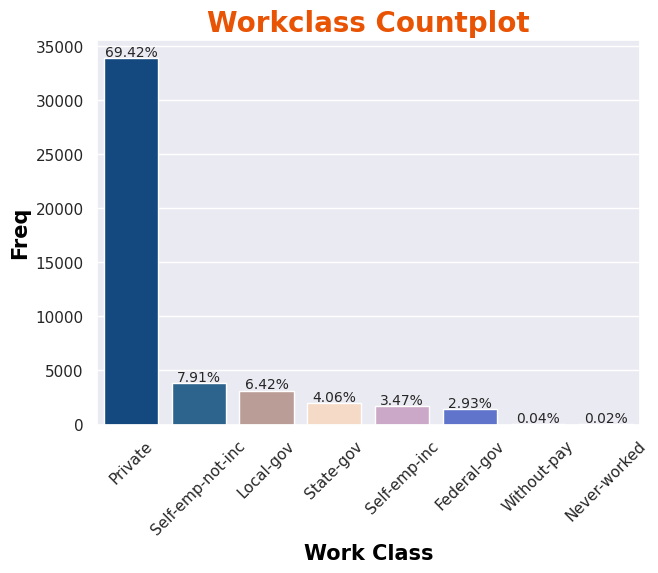


 ################################################## Frequency table ################################################## 



,count,Percentage
workclass,,
Private,33906,69.42
Self-emp-not-inc,3862,7.91
Local-gov,3136,6.42
State-gov,1981,4.06
Self-emp-inc,1695,3.47
Federal-gov,1432,2.93
Without-pay,21,0.04
Never-worked,10,0.02


In [228]:
# Count values in the 'workclass' column
work_values = df["workclass"].value_counts()

# Create the plot
fig, axis = plt.subplots(figsize=(7,5))

# Plot Title
plt.title("Workclass Countplot", weight='bold', fontsize=20, color='#e85304')

# Create the count plot with the custom palette
sns.countplot(data=df, x="workclass", order=work_values.index, palette=custom_palette)

# Axis Labels
plt.xlabel("Work Class", fontsize=15, color='black', weight="bold")
plt.ylabel("Freq", fontsize=15, color='black', weight="bold")

# Rotate x-axis labels for better readability
plt.tick_params(axis='x', labelrotation=45)

# Annotate each bar with percentage values
for idx in range(len(work_values)):
    text = f"{work_values.values[idx] * 100 / len(df):.2f}%"
    plt.text(x=idx, y=work_values.values[idx] + 180, s=text, fontsize=10, ha='center')

# Show the plot
plt.show()

# Frequency Table with Percentage
print("\n", "#"*50, "Frequency table", "#"*50, "\n")
freq = pd.DataFrame(work_values)
freq["Percentage"] = round(work_values * 100 / len(df), 2)
display(freq)


In [229]:
print("Null values in workclass column =",df.workclass.isna().sum())


Null values in workclass column = 2799


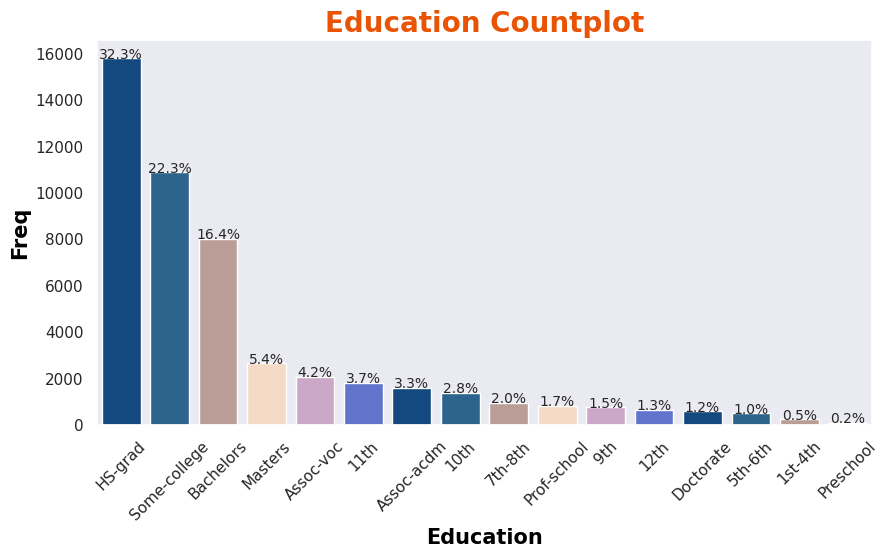

In [230]:
#countplot for education column
education_values=df["education"].value_counts()
fig, axis = plt.subplots(figsize=(10,5))
plt.title("Education Countplot",weight='bold',fontsize=20,color='#e85304')
sns.countplot(data=df,x="education",order=education_values.index, palette=custom_palette)
plt.xlabel("Education",fontsize=15,color='black',weight="bold")
plt.ylabel("Freq",fontsize=15,color='black',weight="bold")
# Rotate x-axis labels
plt.tick_params(axis='x', labelrotation=45)

# Annotate each bar with the percentage
for idx in range(len(education_values)):
    text = f"{education_values.values[idx]*100/len(df):.1f}%"
    plt.text(x=idx, y=education_values.values[idx] + 0.1, s=text, fontsize=10, ha='center')

# Display the plot
plt.grid(False)
plt.show()

From analysis education we can findout:

- HS-grad, Some-college, and Bachelors categories are the majority categories and other columns have low frequency

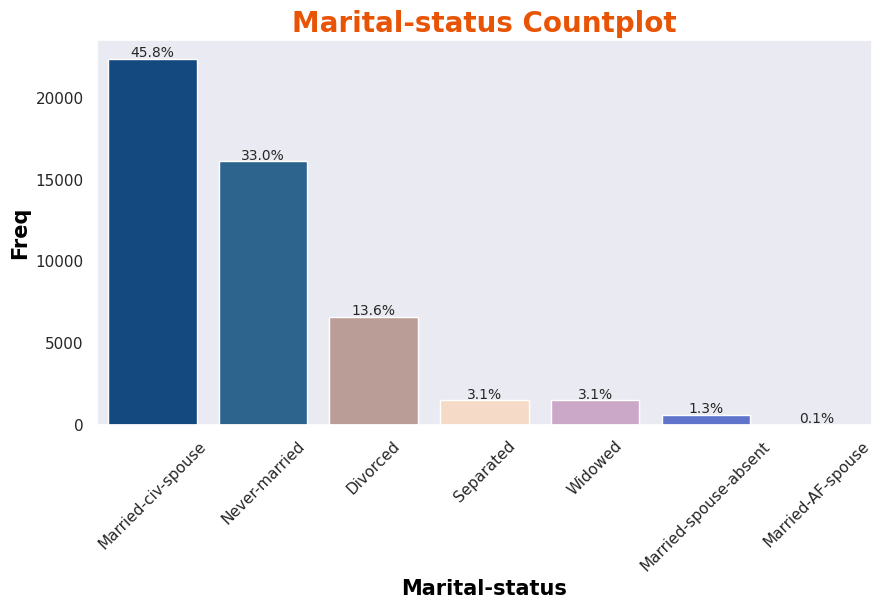


 ################################################## Frequency table ################################################## 

                       Count  Percentage
marital-status                          
Married-civ-spouse     22379       45.82
Never-married          16117       33.00
Divorced                6633       13.58
Separated               1530        3.13
Widowed                 1518        3.11
Married-spouse-absent    628        1.29
Married-AF-spouse         37        0.08


In [231]:
# Count values in the 'marital-status' column
marital_values = df["marital-status"].value_counts()

# Create the plot
fig, axis = plt.subplots(figsize=(10, 5))

# Plot Title
plt.title("Marital-status Countplot", weight='bold', fontsize=20, color='#e85304')

# Create the count plot with the custom palette
sns.countplot(data=df, x="marital-status", order=marital_values.index, palette=custom_palette)
plt.grid(False)  # Disable grid for the whole plot

# Axis Labels
plt.xlabel("Marital-status", fontsize=15, color='black', weight="bold")
plt.ylabel("Freq", fontsize=15, color='black', weight="bold")

# Rotate x-axis labels for better readability
plt.tick_params(axis='x', labelrotation=45)

# Annotate each bar with percentage values
for idx in range(len(marital_values)):
    text = f"{marital_values.values[idx] * 100 / len(df):.1f}%"
    plt.text(x=idx, y=marital_values.values[idx] + 100, s=text, fontsize=10, ha='center')

# Show the plot
plt.show()

# Frequency Table with Percentage
print("\n", "#"*50, "Frequency table", "#"*50, "\n")
freq = pd.DataFrame(marital_values)
freq.columns = ['Count']  # Rename the column to 'Count'
freq["Percentage"] = round(marital_values * 100 / len(df), 2)

# Display the frequency table (use display() if in Jupyter, print(freq) otherwise)
print(freq)


From analysis Marital Status we can findout:

- Married-civ-spouse, Never-married, and Divorced are the majority categories
- Sparated, Widowed, Married-spouse-absent, and Married-AF-spouse minority categories



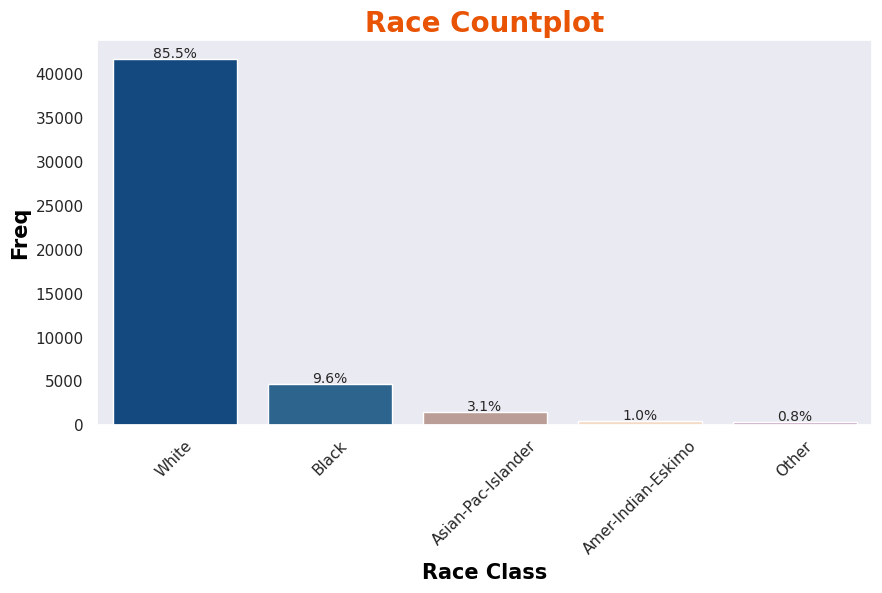


 ################################################## Frequency table ################################################## 



,Count,Percentage
race,,
White,41762,85.50
Black,4685,9.59
Asian-Pac-Islander,1519,3.11
Amer-Indian-Eskimo,470,0.96
Other,406,0.83


In [232]:
# Count values in the 'race' column
race_values = df["race"].value_counts()

# Create the plot
fig, axis = plt.subplots(figsize=(10, 5))

# Plot Title
plt.title("Race Countplot", weight='bold', fontsize=20, color='#e85304')

# Create the count plot
sns.countplot(data=df, x="race", order=race_values.index, palette=custom_palette)

# Axis Labels
plt.xlabel("Race Class", fontsize=15, color='black', weight="bold")
plt.ylabel("Freq", fontsize=15, color='black', weight="bold")

# Rotate x-axis labels for better readability
plt.tick_params(axis='x', labelrotation=45)

# Annotate each bar with percentage values
for idx in range(len(race_values)):
    text = f"{race_values.values[idx] * 100 / len(df):.1f}%"
    plt.text(x=idx, y=race_values.values[idx] + 100, s=text, fontsize=10, ha='center')
    axis.grid(False)
# Show the plot
plt.show()

# Frequency Table with Percentage
print("\n", "#"*50, "Frequency table", "#"*50, "\n")
freq = pd.DataFrame(race_values)
freq.columns = ['Count']  # Rename the column to 'Count'
freq["Percentage"] = round(freq['Count'] * 100 / len(df), 2)

# Display the frequency table
display(freq)


From analysis Race we can findout:

- White category is the majority category so in the most this feature will not be useful for our ML model




 ################################################## Frequency table ################################################## 



,count,Percentage
gender,,
Male,32650,66.85
Female,16192,33.15


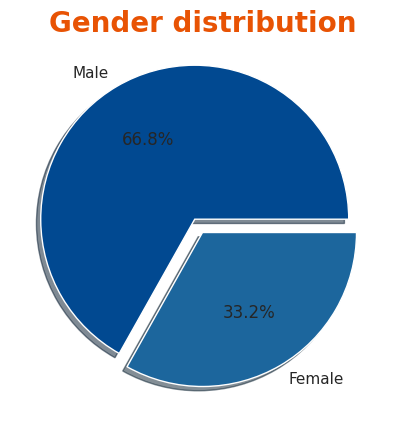

In [233]:
#pie chart for gender
gender_values=df["gender"].value_counts()
fig, axis = plt.subplots(figsize=(7,5))
plt.title("Gender distribution",weight="bold",fontsize=20,color='#e85304')
explode = [0.1 if i == 0 else 0 for i in range(len(gender_values))]
plt.pie(gender_values,labels=gender_values.index,autopct='%1.1f%%',explode=explode ,colors=custom_palette, shadow=True)
print("\n","#"*50,"Frequency table","#"*50,"\n")
freq=pd.DataFrame(gender_values)
freq["Percentage"] = round(freq['count']*100/len(df),2)
display(freq)

From analysis Gender we can findout:

- Male category is the majority category

- Female category is the minority category



([<matplotlib.patches.Wedge at 0x7c7ff78fed10>,
 [Text(-0.8766136384035532, 0.8194806458757183, '<=50K'),
  Text(0.8035624667041534, -0.7511906296702167, '>50K')],
 [Text(-0.511357955735406, 0.4780303767608357, '76.1%'),
  Text(0.43830680002044725, -0.40974034345648175, '23.9%')])

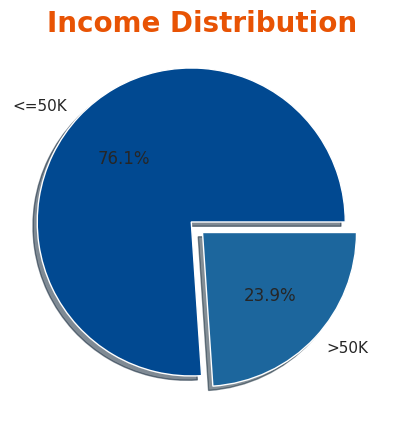

In [234]:
income_values=df["income"].value_counts()
fig, axis=plt.subplots(figsize=(7,5))
plt.title("Income Distribution",fontsize=20,weight="bold",color="#e85304")
plt.pie(income_values,labels=income_values.index,autopct='%1.1f%%',explode=[0.1 if i==0 else 0 for i in range(len(income_values))],colors=custom_palette,shadow=True)

From analysis Income we can findout:

- Target column imbalanced

- <=50k category is the majority category

In [235]:
#separating numerical columns
numerical_cols = df.select_dtypes(include=np.number)

print("These are Numerical Columns")

for col in numerical_cols:
    col.capitalize()
    print(col.capitalize())



These are Numerical Columns
Age
Fnlwgt
Educational-num
Capital-gain
Capital-loss
Hours-per-week


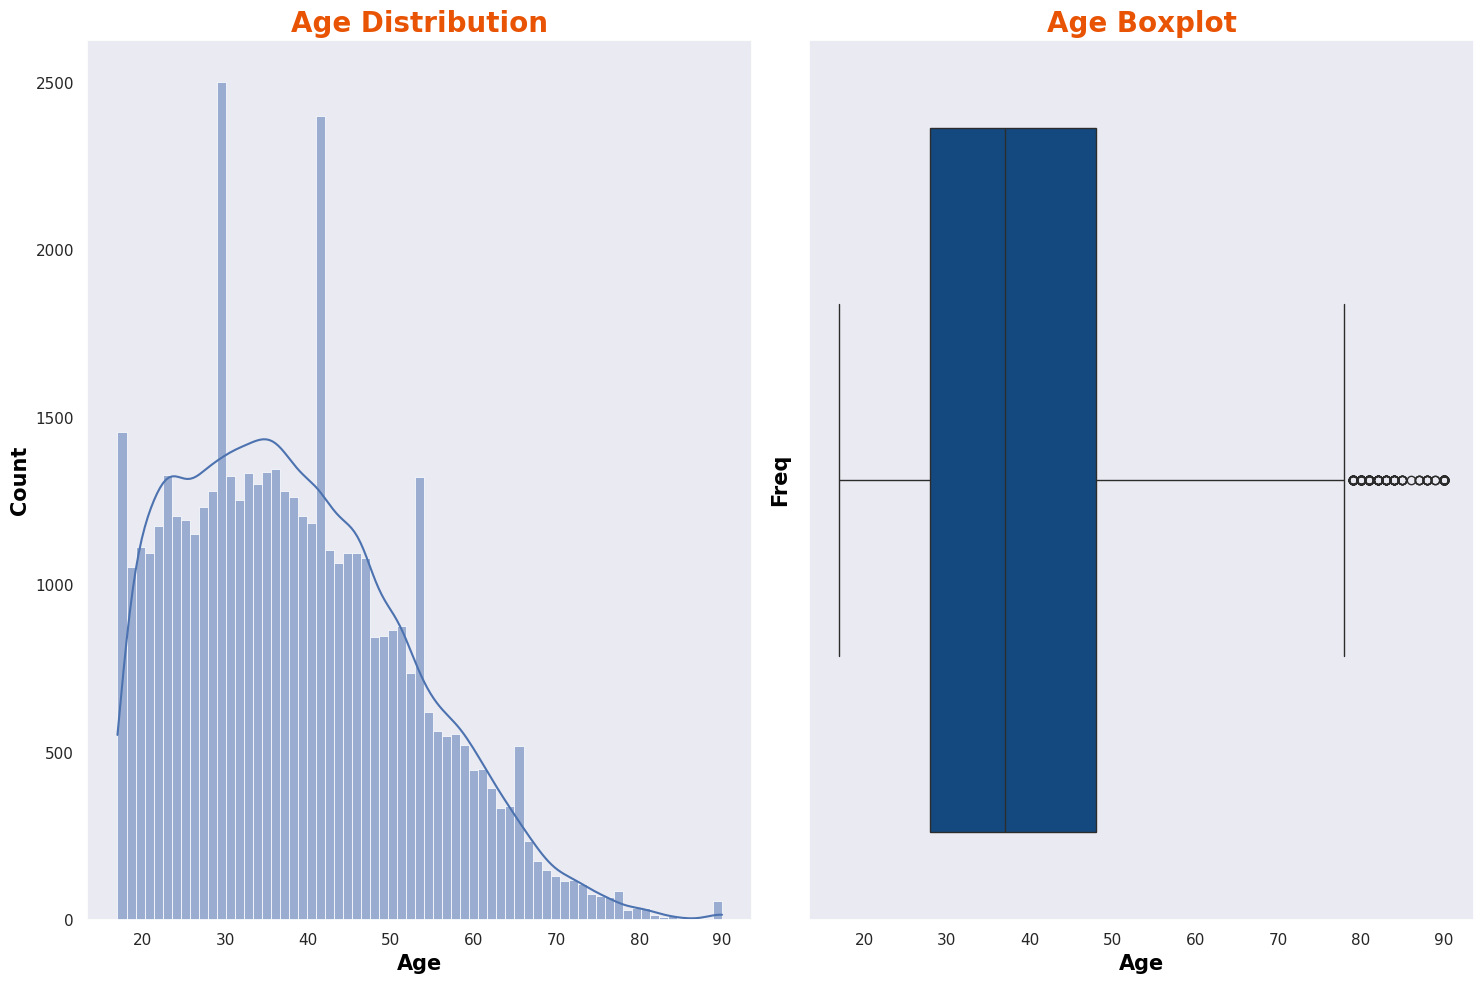

In [236]:
fig, axis = plt.subplots(1, 2, figsize=(15, 10))

# Histogram subplot
axis[0].set_title("Age Distribution", fontsize=20, weight="bold", color="#e85304")
sns.histplot(data=df, x="age", kde=True, palette=custom_palette, ax=axis[0])  # Use 'color' instead of 'palette'
axis[0].set_xlabel("Age", fontsize=15, color="black", weight="bold")
axis[0].set_ylabel("Count", fontsize=15, color="black", weight="bold")
axis[0].grid(False)  # Grid setting for the first subplot

# Boxplot subplot
axis[1].set_title("Age Boxplot", fontsize=20, weight="bold", color="#e85304")
sns.boxplot(data=df, x="age", palette=custom_palette, ax=axis[1])
axis[1].set_xlabel("Age", fontsize=15, color="black", weight="bold")
axis[1].set_ylabel("Freq", fontsize=15, color="black", weight="bold")
axis[1].grid(False)  # Grid setting for the second subplot

plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()


From analysis Age we can findout:

- Age distribution right skewed

- Age column have outliers need to handle

In [237]:
# Creating a new 'capital' column by subtracting 'capital-loss' from 'capital-gain'
df['capital'] = df['capital-gain'] - df['capital-loss']

# Using np.where to classify 'capital' as 'gain', 'loss', or 'neither'
df['capital'] = df['capital'].apply(lambda x: 'gain' if x > 0 else ('loss' if x < 0 else 'neither'))

# Displaying the first 20 rows to verify the changes
df.head(20)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,capital
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,neither
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,neither
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,neither
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,gain
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K,neither
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,neither
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K,neither
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K,gain
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K,neither
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K,neither


In [238]:
df=df.drop(["capital-gain", "capital-loss"], axis=1)

In [239]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,capital
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K,neither
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K,neither
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K,neither
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K,gain
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,30,United-States,<=50K,neither
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K,neither
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,40,United-States,<=50K,neither
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,32,United-States,>50K,gain
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,40,United-States,<=50K,neither
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,10,United-States,<=50K,neither


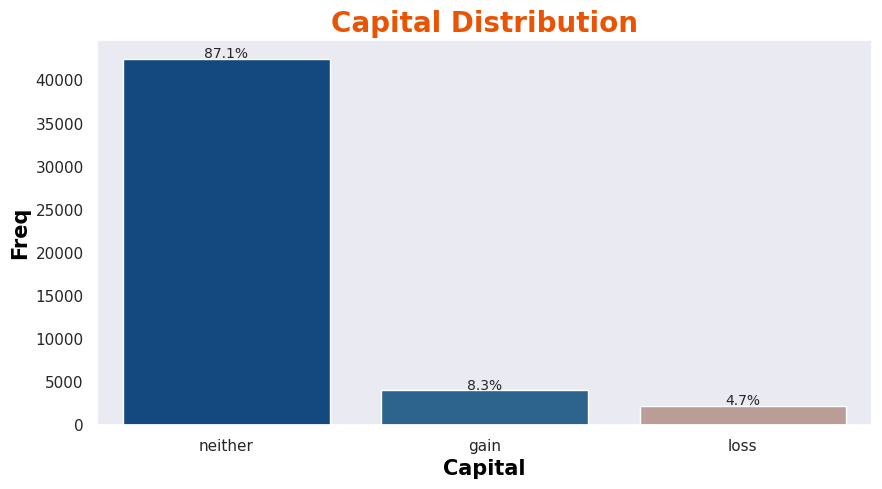

In [240]:
#count plot for the capital column
capital_values=df["capital"].value_counts()
fig,axis=plt.subplots(figsize=(10,5))
plt.title("Capital Distribution",fontsize=20,weight="bold",color="#e85304")
sns.countplot(data=df,x="capital",palette=custom_palette)
plt.xlabel("Capital",fontsize=15,color="black",weight="bold")
plt.ylabel("Freq",fontsize=15,color="black",weight="bold")
for idx in range(len(capital_values)):
    text = f"{capital_values.values[idx]*100/len(df):.1f}%"
    plt.text(x=idx,y=capital_values.values[idx]+100,s=text,fontsize=10,ha='center')
plt.grid(False)
plt.show()

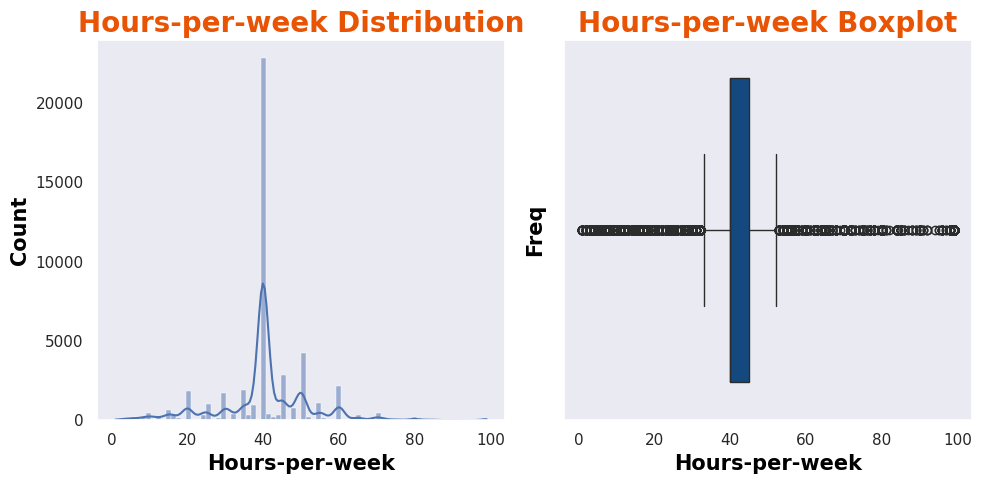

In [241]:
#histplot and box plot for hours-per-week column
fig, axis = plt.subplots(1, 2, figsize=(10, 5))
axis[0].set_title("Hours-per-week Distribution",fontsize=20,weight="bold",color="#e85304")
sns.histplot(data=df,x="hours-per-week",bins="rice",kde=True,palette=custom_palette,ax=axis[0])
axis[0].set_xlabel("Hours-per-week",fontsize=15,color="black",weight="bold")
axis[0].set_ylabel("Count",fontsize=15,color="black",weight="bold")
axis[0].grid(False)
axis[1].set_title("Hours-per-week Boxplot",fontsize=20,weight="bold",color="#e85304")
sns.boxplot(data=df,x="hours-per-week",palette=custom_palette,ax=axis[1])
axis[1].set_xlabel("Hours-per-week",fontsize=15,color="black",weight="bold")
axis[1].set_ylabel("Freq",fontsize=15,color="black",weight="bold")
axis[1].grid(False)
plt.tight_layout()
plt.show()


From analysis Hours per week we can findout:

- Hours per week column have outliers need to handle



In [242]:
def outliers_handler(real_data:pd.DataFrame(),col_name:str)->pd.DataFrame():
    data=real_data.copy()
    q1 = np.percentile(data[col_name],25)
    q3 = np.percentile(data[col_name],75)
    iqr = q3-q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    outliers = (data[col_name]>upper_bound) | (data[col_name]<lower_bound)
    num_of_outliers = len(data[outliers])
    if num_of_outliers <= len(data)*0.1:
        data = data[~outliers]
        print("Outliers dropped")
    else:
        data.loc[data[col_name]>upper_bound,col_name] = upper_bound
        data.loc[data[col_name]<lower_bound,col_name] = lower_bound
        print("Outliers replaced")
    return data

In [243]:
for i in ["age", "hours-per-week"]:
    df = outliers_handler(df, i)


Outliers dropped
Outliers replaced


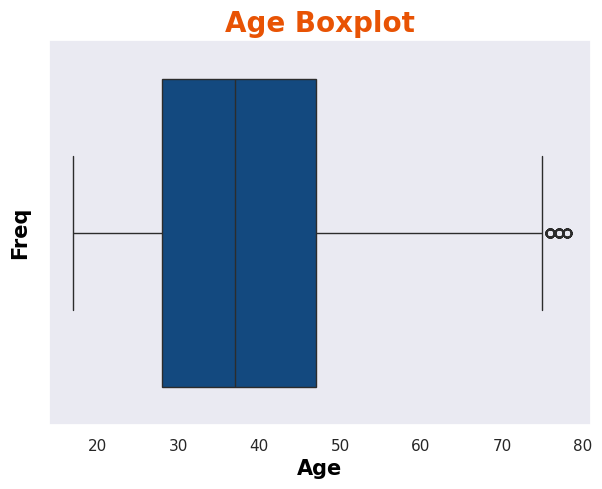

Age Outliers removed


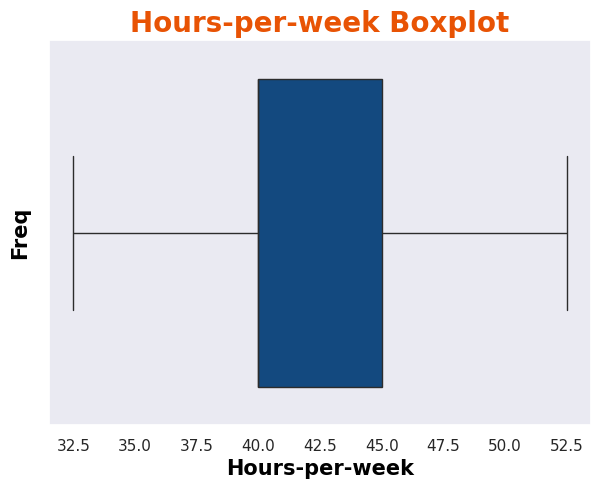

Hours-per-week Outliers removed


In [244]:
#boxplot to check outliers after using iqr methon
for col in ["age", "hours-per-week"]:
    fig,axis=plt.subplots(figsize=(7,5))
    plt.title(col.capitalize()+" Boxplot",fontsize=20,weight="bold",color="#e85304")
    sns.boxplot(data=df,x=col,palette=custom_palette)
    plt.xlabel(col.capitalize(),fontsize=15,color="black",weight="bold")
    plt.ylabel("Freq",fontsize=15,color="black",weight="bold")
    axis.grid(False)
    plt.show()
    print(col.capitalize(),"Outliers removed")


#Bivariate Analysis



In [245]:
#Handling Missing Values
df=df.fillna({'workclass':'Private','occupation':'Prof-specialty','native-country':'United-States'})
print(df.select_dtypes(include="object").columns.to_list())


['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income', 'capital']


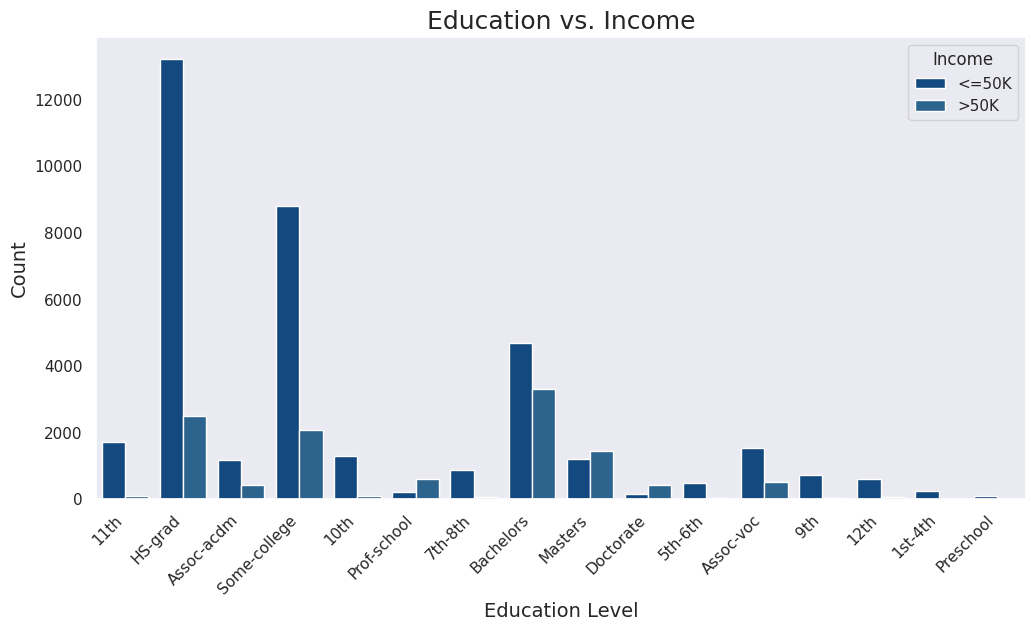

In [246]:
#education vs income
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='education', hue='income', palette=custom_palette)
plt.title('Education vs. Income', fontsize=18)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income', loc='upper right')
plt.grid(False)
plt.show()


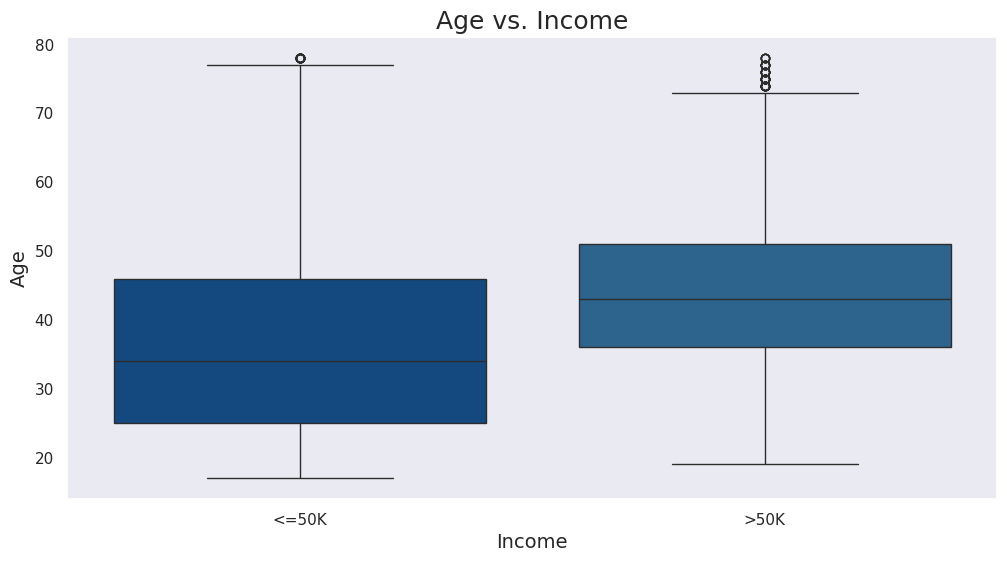

In [247]:
#age vs income
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='income', y='age', palette=custom_palette)
plt.title('Age vs. Income', fontsize=18)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.grid(False)
plt.show()


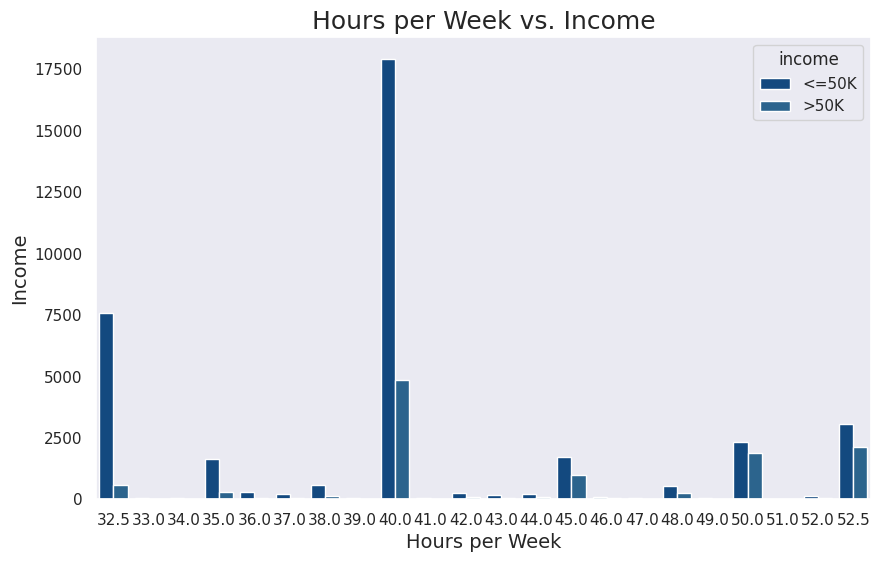

In [248]:
#count plot Hours per Week vs. Income
plt.figure(figsize=(10, 6))
plt.title('Hours per Week vs. Income', fontsize=18)
sns.countplot(data=df, x='hours-per-week', hue='income', palette=custom_palette)
plt.xlabel('Hours per Week', fontsize=14)
plt.ylabel('Income', fontsize=14)
plt.grid(False)
plt.show()

In [249]:
df[["age","income"]]

,age,income
0,25,<=50K
1,38,<=50K
2,28,>50K
3,44,>50K
4,18,<=50K
...,...,...
48837,27,<=50K
48838,40,>50K
48839,58,<=50K
48840,22,<=50K


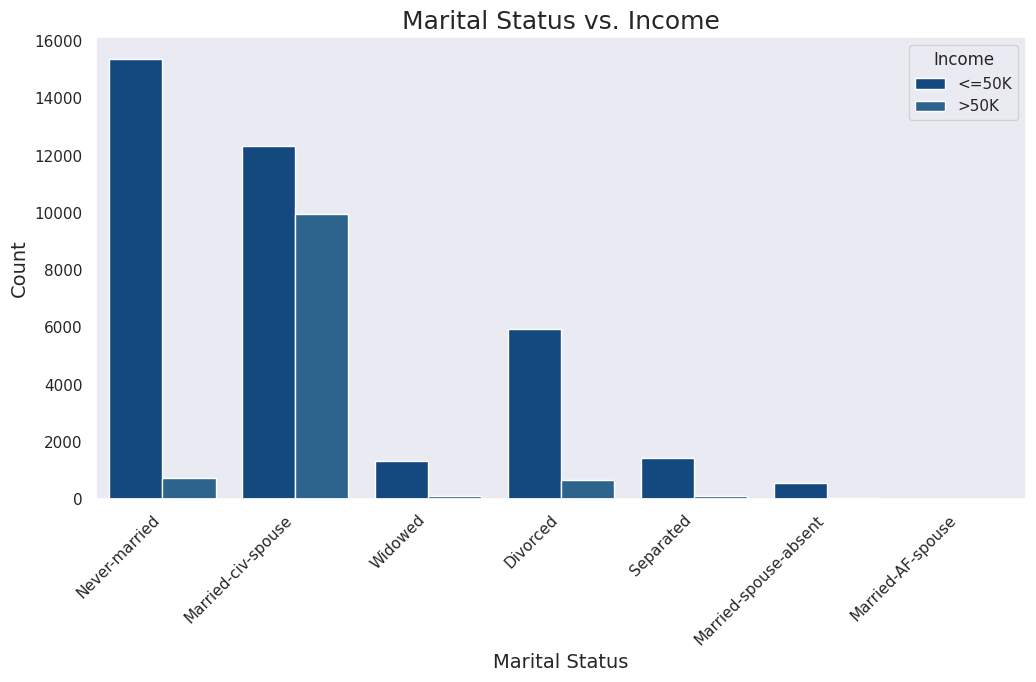

In [250]:
# Relationship between marital status and income using a countplot
plt.figure(figsize=(12, 6))
sns.countplot(x='marital-status', hue='income', data=df, palette=custom_palette)
plt.title('Marital Status vs. Income', fontsize=18)
plt.xlabel('Marital Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income', loc='upper right')
plt.grid(False)
plt.show()

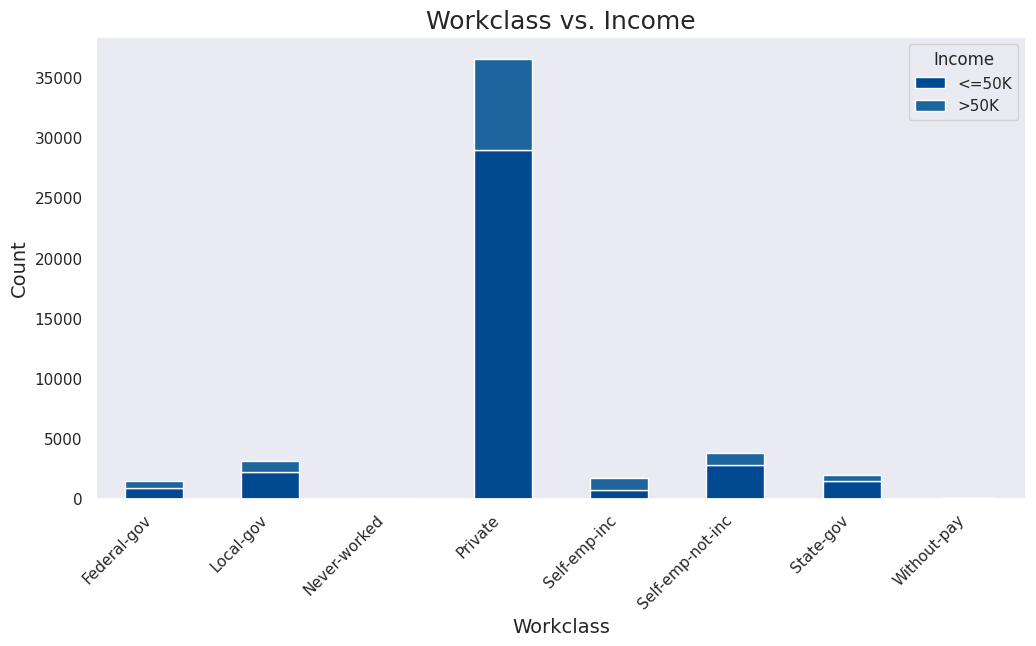

In [251]:
# Relationship between workclass and income using a stacked bar chart
workclass_income = pd.crosstab(df['workclass'], df['income'])
workclass_income.plot(kind='bar', stacked=True, figsize=(12, 6), color=custom_palette[:2])
plt.title('Workclass vs. Income', fontsize=18)
plt.xlabel('Workclass', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income', loc='upper right')
plt.grid(False)
plt.show()


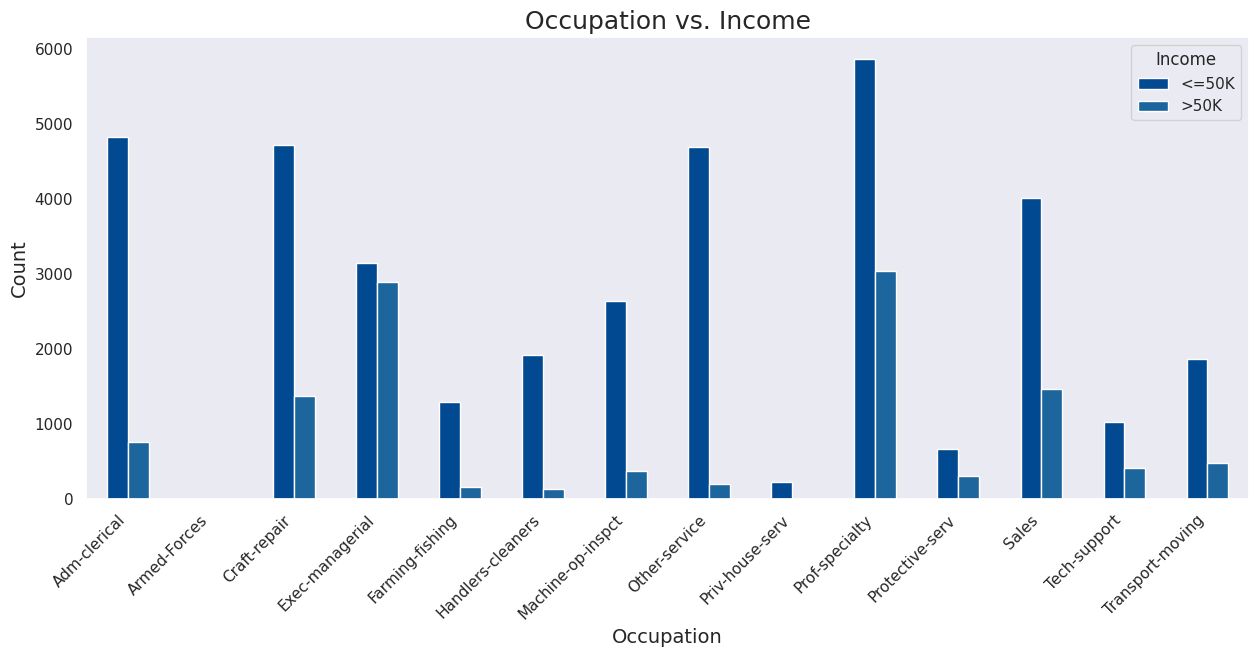

In [252]:
# Relationship between occupation and income using a clustered bar chart
occupation_income = pd.crosstab(df['occupation'], df['income'])
occupation_income.plot(kind='bar', figsize=(15, 6), color=custom_palette[:2])
plt.title('Occupation vs. Income', fontsize=18)
plt.xlabel('Occupation', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income', loc='upper right')
plt.grid(False)
plt.show()

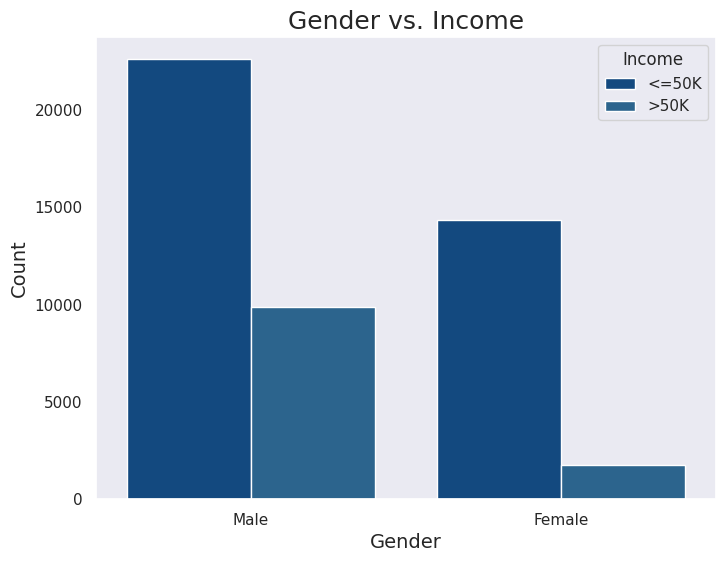

In [253]:
# Relationship between gender and income using a countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='income', data=df, palette=custom_palette)
plt.title('Gender vs. Income', fontsize=18)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Income', loc='upper right')
plt.grid(False)
plt.show()

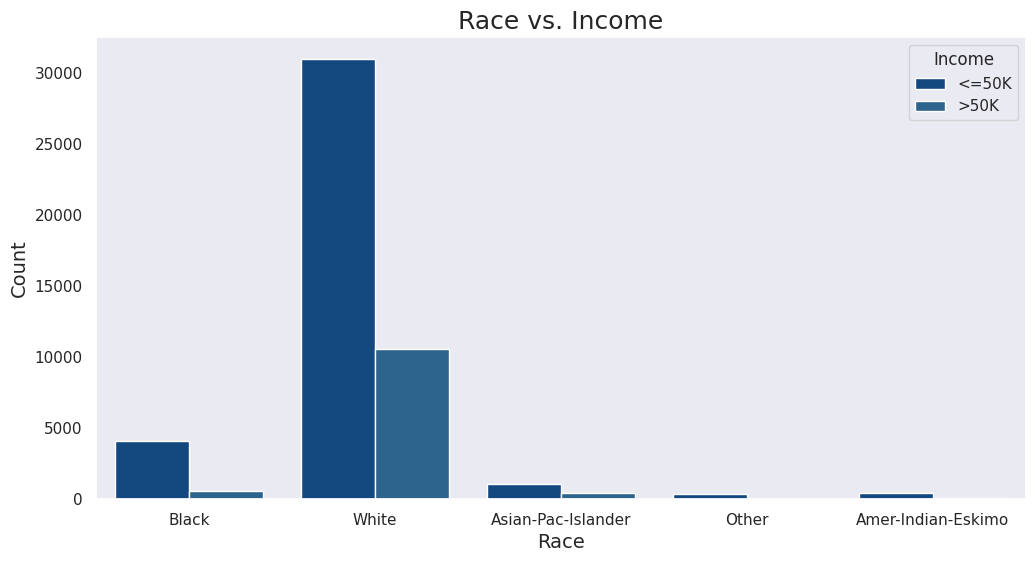

In [254]:
# Relationship between race and income using a countplot
plt.figure(figsize=(12, 6))
sns.countplot(x='race', hue='income', data=df, palette=custom_palette)
plt.title('Race vs. Income', fontsize=18)
plt.xlabel('Race', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Income', loc='upper right')
plt.grid(False)
plt.show()

In [255]:
#lable encoding ofcategorical columns
le=LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col]=le.fit_transform(df[col])

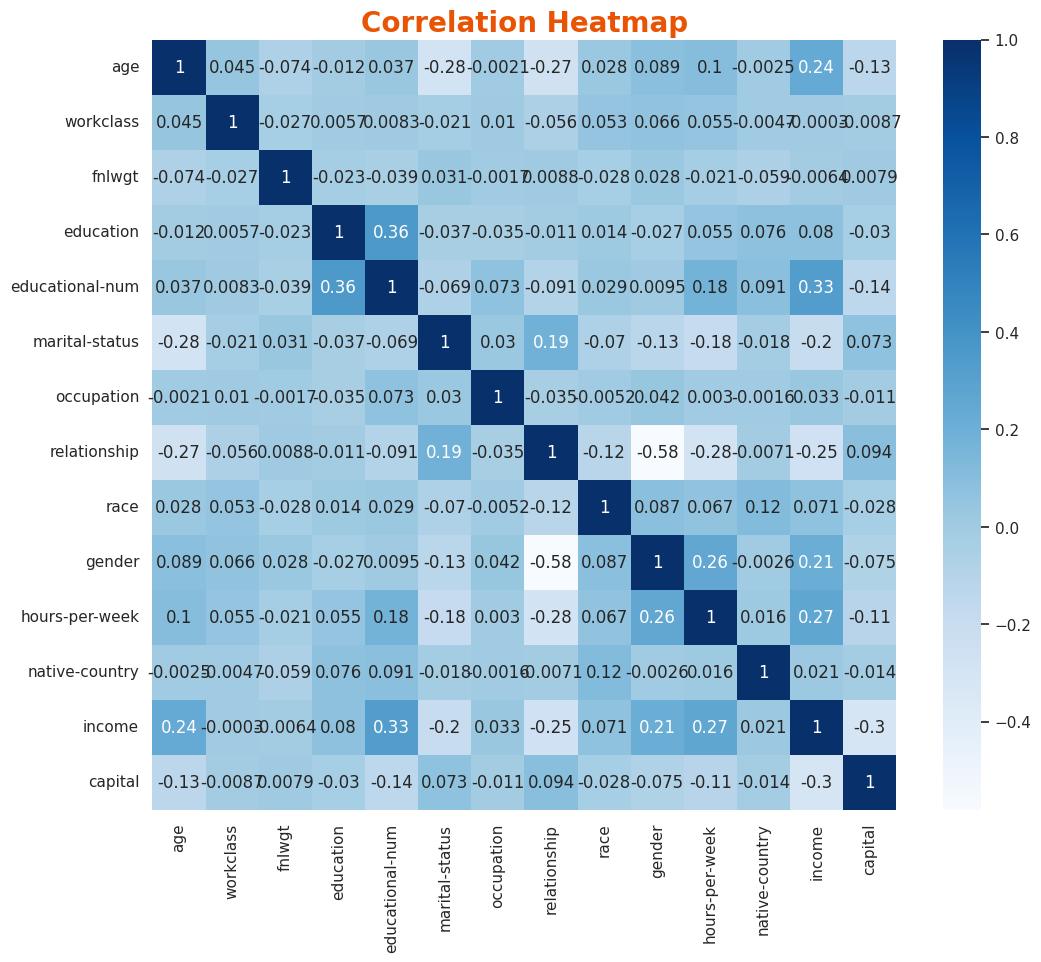

In [256]:
#correalation heatmap for all

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="Blues" )
plt.title("Correlation Heatmap",fontsize=20,weight="bold",color="#e85304")
plt.show()